In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Myriad Pro'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

import numpy as np
from utils import *

obj0 = np.loadtxt('his_obj_dps0.csv', delimiter=',')
obj1 = np.loadtxt('his_obj_dps1.csv', delimiter=',')
hobj = np.loadtxt('his_obj_actual.csv', delimiter=',')

mins0 = np.min(obj0, axis=0)
maxs0 = np.max(obj0, axis=0)
mins1 = np.min(obj1, axis=0)
maxs1 = np.max(obj1, axis=0)
mins = np.minimum(mins0, mins1)
maxs = np.maximum(maxs0, maxs1)

obj0_rescaled = (obj0 - mins)/(maxs - mins)
obj1_rescaled = (obj1 - mins)/(maxs - mins)
hobj_rescaled = (hobj - mins)/(maxs - mins)

diff0 = np.sum((obj0_rescaled - hobj_rescaled)**2, axis = 1)
diff1 = np.sum((obj1_rescaled - hobj_rescaled)**2, axis = 1)
diff_max = np.max([np.max(diff0), np.max(diff1)])
diff_min = np.min([np.min(diff0), np.min(diff1)])
diff0_rescaled = (diff0 - diff_min)/(diff_max - diff_min)
diff1_rescaled = (diff1 - diff_min)/(diff_max - diff_min)


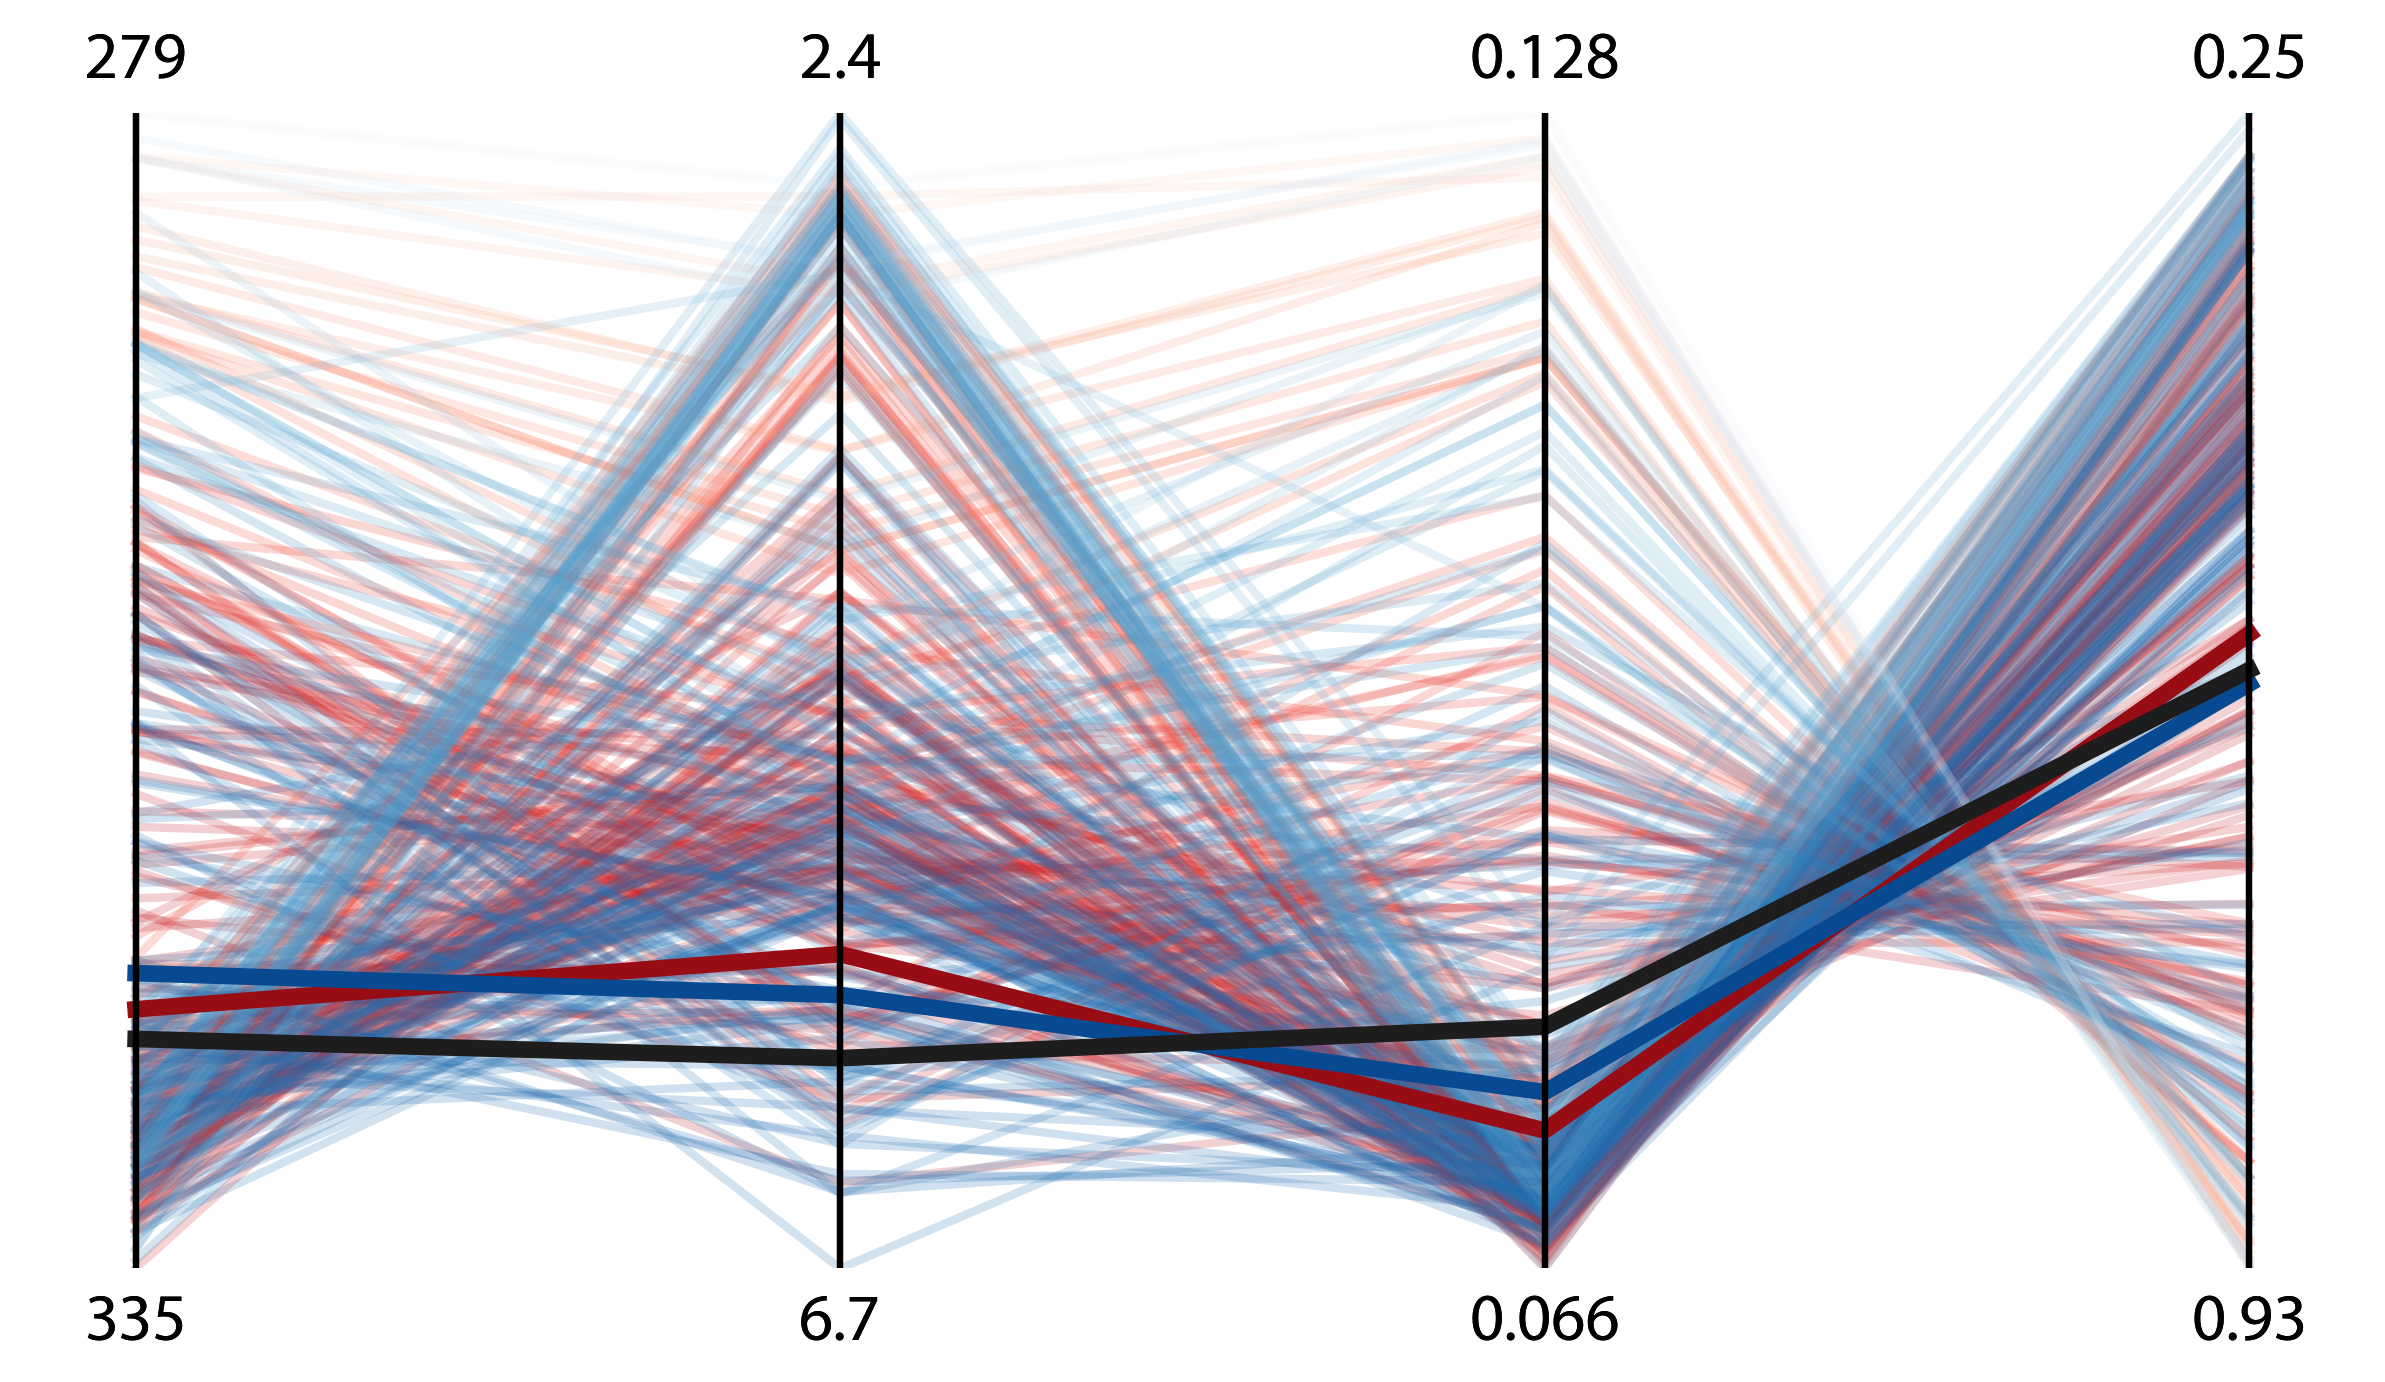

In [2]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

xlabels = ['obj1', 'obj2', 'obj3', 'obj4']
precision = [0, 1, 3, 2]

shading_tru = diff0_rescaled
shading_bin = diff1_rescaled

plotter = parallel_coords(mins, maxs, xlabels, precision)
plotter.plot_(ax, obj0, cmap = 'Reds_r', shading = shading_tru)
plotter.plot_(ax, obj1, cmap = 'Blues_r', shading = shading_bin)

idx0, idx1 = np.argmin(diff0), np.argmin(diff1)
plotter.plot_single_traj(ax, obj0[idx0], cmap = 'Reds_r')
plotter.plot_single_traj(ax, obj1[idx1], cmap = 'Blues_r')
plotter.plot_single_traj(ax, hobj, cmap = 'Greys_r')




In [ ]:
diff0 = np.sum((obj0_rescaled - hobj_rescaled)**2, axis = 1)
diff1 = np.sum((obj1_rescaled - hobj_rescaled)**2, axis = 1)
print([np.argmin(diff0), np.argmin(diff1)]) 
diff_max = np.max([np.max(diff0), np.max(diff1)])